## B. Topic Modelling : PART-I

Topic Modelling is implemented using the following two methods:
1. Bertopic
2. LDA ( Latent Dirichlet Allocation )

This module focuses on the implementation of Bertopic to identify key topics.

In [1]:
# load required packages/libraries
import os
import time
import math
import re
from pprint import pprint
from textblob import TextBlob
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
import multiprocessing
import string

nltk.download('wordnet')
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

import warnings
warnings.filterwarnings("ignore")

import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from bertopic import BERTopic


2023-05-26 08:04:27.530614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 08:04:32.087940: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-05-26 08:04:32.088159: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

#### a) Data Extraction

In [2]:
# Load the dataset
news_tm = pd.read_parquet('processed_news_articles.parquet', engine='pyarrow')

# Check the shape of dataset
news_tm.shape

(160842, 9)

In [3]:
# Display a few records
news_tm.head(3)

url        date language   
0  http://en.people.cn/n3/2021/0318/c90000-983012...  2021-03-18       en  \
1                   http://www.dataweek.co.za/12835r  2021-03-26       en   
2  http://www.homeoffice.consumerelectronicsnet.c...  2021-03-10       en   

                                               title   
0  Artificial intelligence improves parking effic...  \
1  Forget ML, AI and Industry 4.0 – obsolescence ...   
2  Strategy Analytics: 71% of Smartphones Sold Gl...   

                                                text   
0  \n\nArtificial intelligence improves parking e...  \
1  \n\nForget ML, AI and Industry 4.0 – obsolesce...   
2  \n\nStrategy Analytics: 71% of Smartphones Sol...   

                                        cleaned_text   
0  artificial intelligence improves parking effic...  \
1  forget ml ai industry obsolescence focus febru...   
2  strategy analytics smartphones sold globally a...   

                                     lemmatized_text  num_tokens token_bucket  
0  artificial intelligence improves parking effic...        5752   5001-10000  
1  forget ml ai industry obsolescence focus febru...       13520  10001-15000  
2  strategy analytics smartphones sold globally a...        9490   5001-10000

### b) Bertopic

In [5]:
# Get the cleaned tokens from the DataFrame
cleaned_tokens = news_tm['lemmatized_text'].tolist()

%time

topic_model = BERTopic(language="english", min_topic_size=100, n_gram_range=(1,2), calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_tokens)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


Batches:   0%|          | 0/5027 [00:00<?, ?it/s]

2023-05-26 09:54:56,124 - BERTopic - Transformed documents to Embeddings
2023-05-26 09:59:24,395 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-05-26 10:11:22,008 - BERTopic - Clustered reduced embeddings


In [6]:
print("Number of topics in the processed news articles dataset:", topic_model.get_topic_freq().shape[0])

Number of topics in the processed news articles dataset: 267


Let's look at top topics.

In [7]:
# Retrieve the top topics and their associated documents
top_topics = topic_model.get_topic_freq().head(25)  
top_topic_ids = top_topics['Topic']

for topic_id in top_topic_ids:
    # Get keywords associated with the current topic
    keywords = topic_model.get_topic(topic_id)
    
    # Retrieve assigned topics for documents
    assigned_topics = topics
    
    # Find representative documents for the current topic
    representative_documents = [i for i, t in enumerate(assigned_topics) if t == topic_id]
    
    # Print the topic ID and its associated keywords
    print(f"Topic {topic_id}: {', '.join([word[0] for word in keywords])}")
    print()


Topic -1: ai, news, data, new, technology, media, gray, intelligence, said, group

Topic 0: market, analysis, global, growth, report, players, key, forecast, trends, size

Topic 1: ment, cision, products, entertain ment, entertain, overview, resources, consumer, send release, services

Topic 2: npr, radio, schedule, donate, public, programs, air, music, listen, donation

Topic 3: market, artificial intelligence, artificial, intelligence, report, analysis, growth, global, global artificial, intelligence market

Topic 4: us, newswires, presswire, ein, ein presswire, us new, releases, south, guinea, dakota

Topic 5: microsoft, bing, openai, chatgpt, windows, search, new, tab, google, new tab

Topic 6: students, chatgpt, education, teachers, school, student, schools, writing, use, said

Topic 7: venturebeat, follow, follow us, vb, venturebeat homepage, us rss, homepage, twitter follow, follow follow, transform

Topic 8: und, zu, die, sie, hoc, von, auf, nachrichten, im, euro

Topic 9: wfmz

Bertopic majorly identified topics related to AI, jobs industries and othe applications related to AI.

Let's visualize the topics using word cloud and hiearchical clustering.

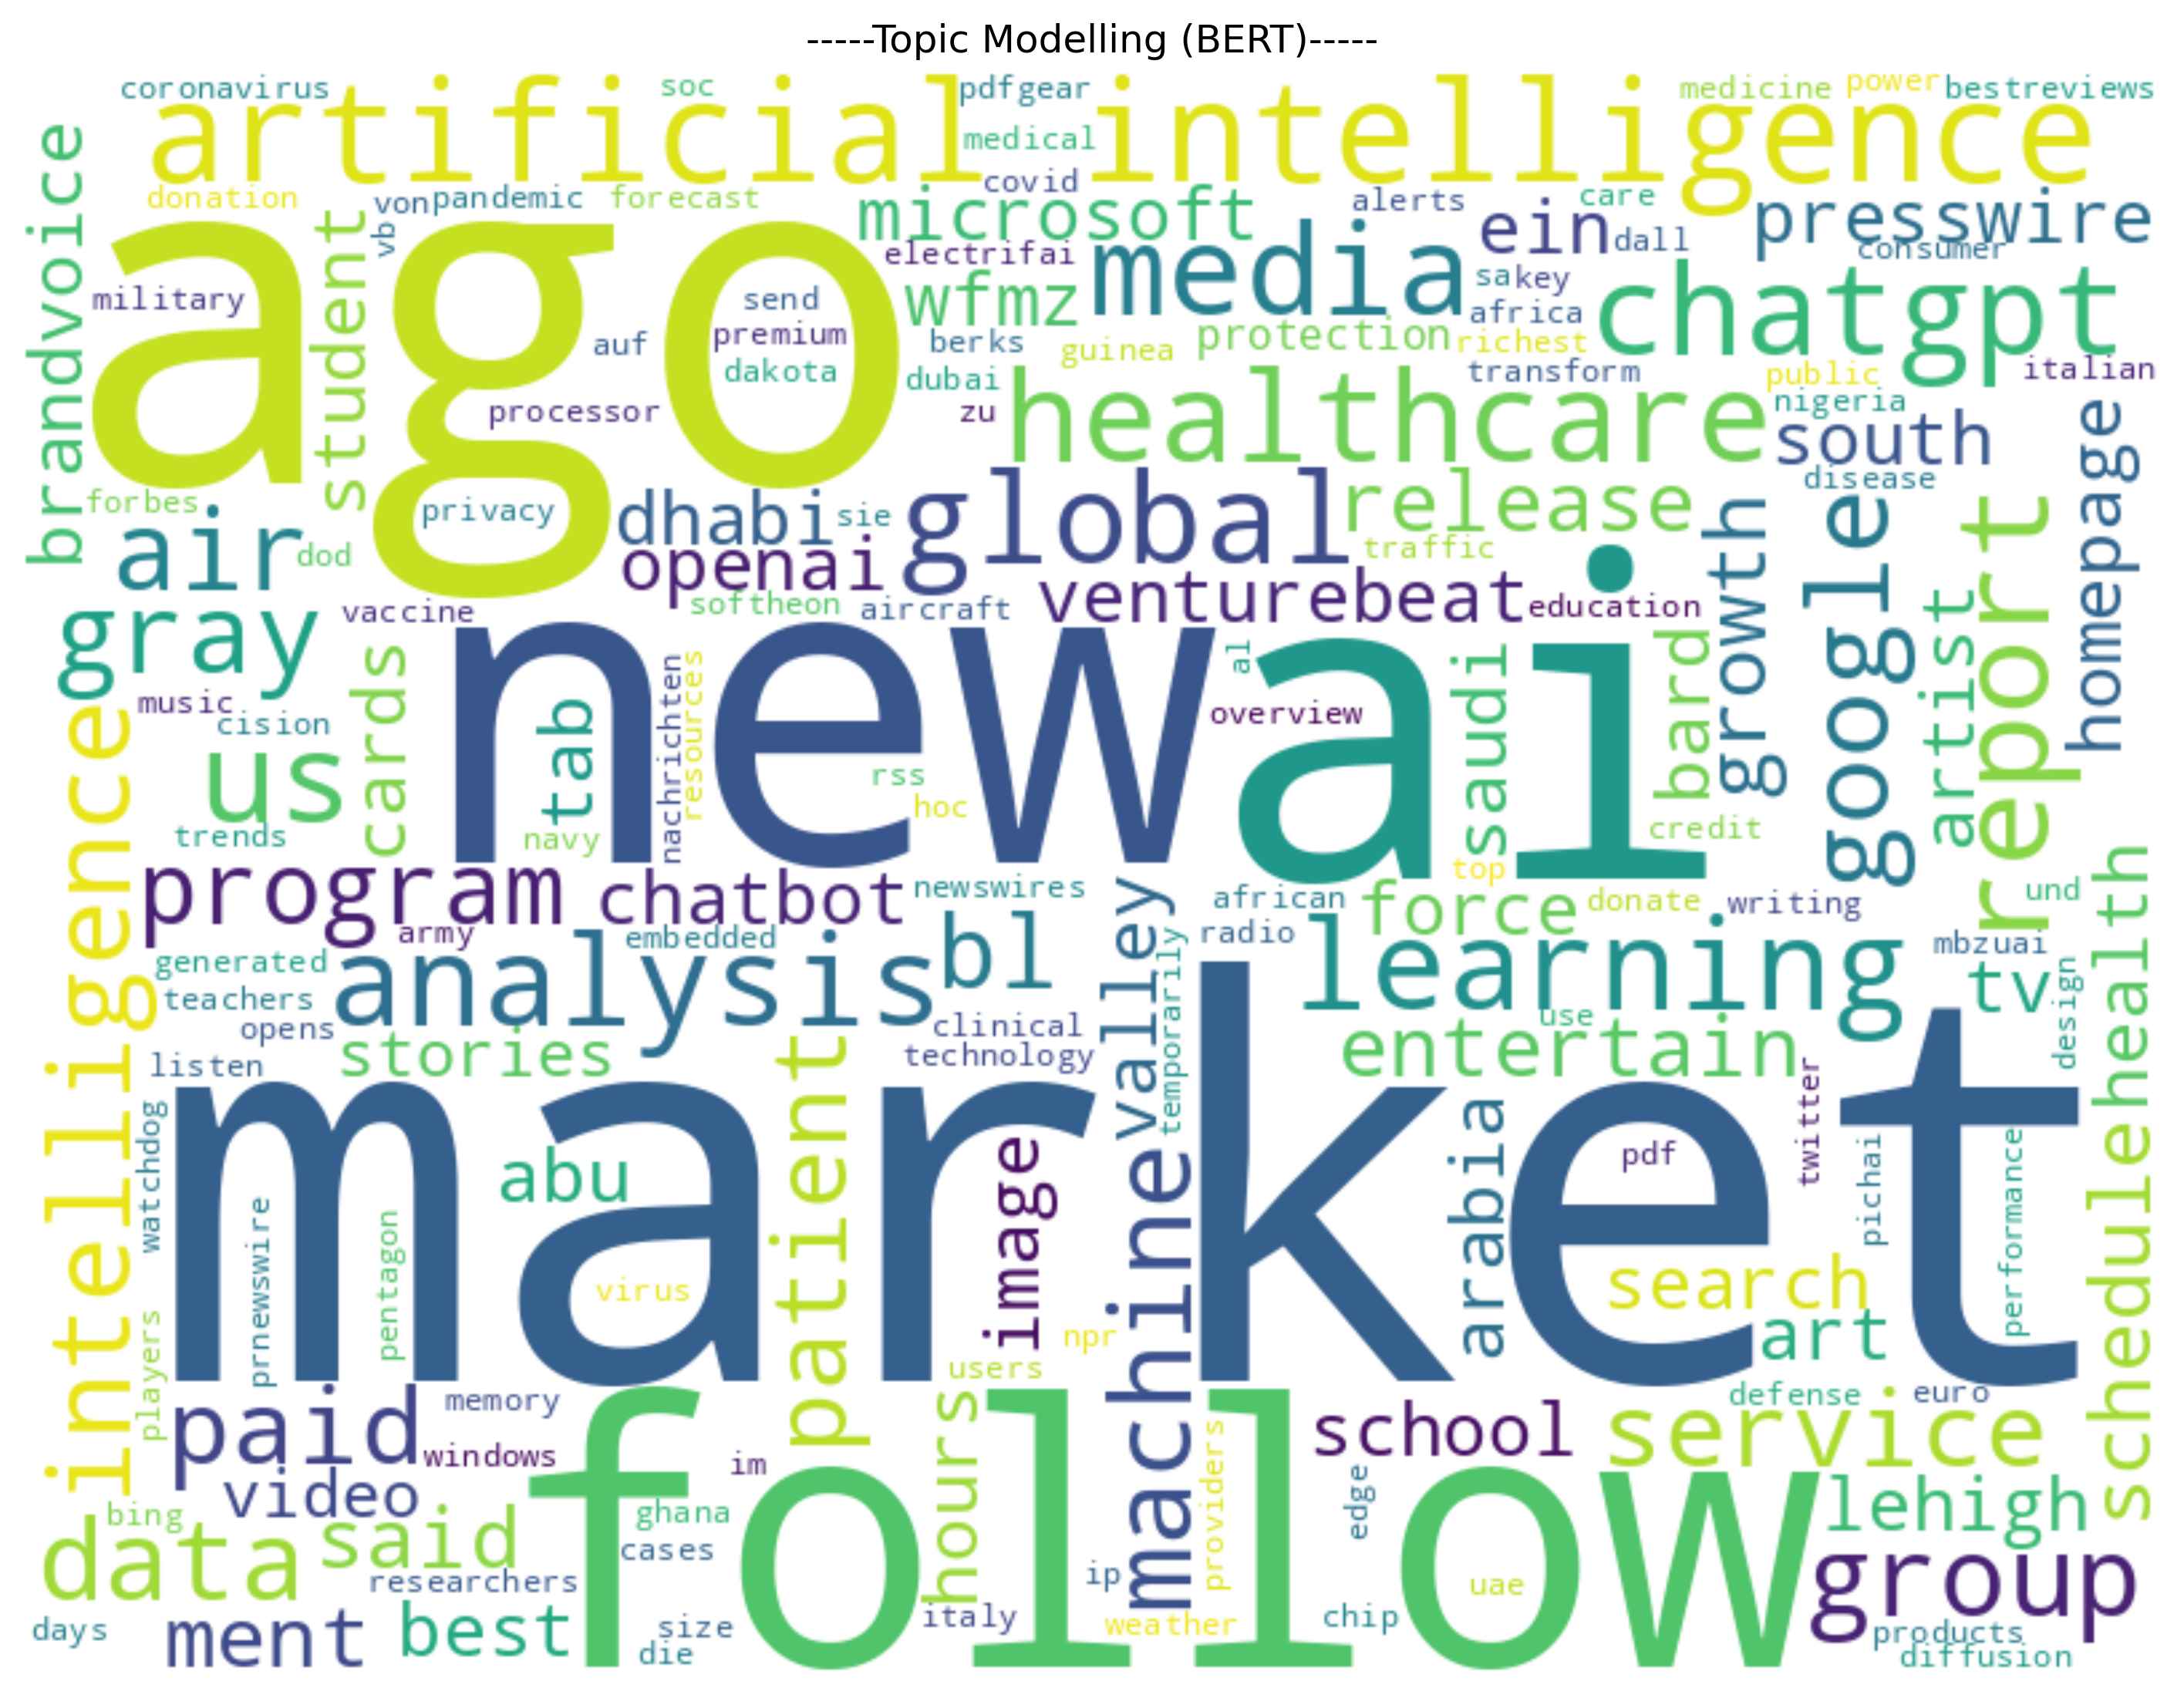

In [8]:
# Concatenate keywords from all topics
all_keywords = []
for topic_id in top_topic_ids:
    keywords = topic_model.get_topic(topic_id)
    all_keywords.extend([word for word, _ in keywords])

# Generate word cloud
wordcloud = WordCloud(background_color='white', width=800, height=600).generate(' '.join(all_keywords))

# Create a figure and set the DPI
fig = plt.figure(figsize=(12, 9), dpi=300)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("-----Topic Modelling (BERT)-----")
plt.axis('off')

# Show the plot with adjusted DPI
fig.set_dpi(300)
plt.show()

In [9]:
# Assign each news article a topic
news_tm["bert_topics"] = topic_model.topics_

In [10]:
news_tm.head()

url        date language   
0  http://en.people.cn/n3/2021/0318/c90000-983012...  2021-03-18       en  \
1                   http://www.dataweek.co.za/12835r  2021-03-26       en   
2  http://www.homeoffice.consumerelectronicsnet.c...  2021-03-10       en   
3  http://www.itbusinessnet.com/2020/10/olympus-t...  2020-10-20       en   
4  http://www.mysmartrend.com/news-briefs/technic...  2020-04-17       en   

                                               title   
0  Artificial intelligence improves parking effic...  \
1  Forget ML, AI and Industry 4.0 – obsolescence ...   
2  Strategy Analytics: 71% of Smartphones Sold Gl...   
3  Olympus to Support Endoscopic AI Diagnosis Edu...   
4  Cr Bard Inc Has Returned 48.9% Since SmarTrend...   

                                                text   
0  \n\nArtificial intelligence improves parking e...  \
1  \n\nForget ML, AI and Industry 4.0 – obsolesce...   
2  \n\nStrategy Analytics: 71% of Smartphones Sol...   
3  \n\nOlympus to Support Endoscopic AI Diagnosis...   
4  \n\nCr Bard Inc Has Returned 48.9% Since SmarT...   

                                        cleaned_text   
0  artificial intelligence improves parking effic...  \
1  forget ml ai industry obsolescence focus febru...   
2  strategy analytics smartphones sold globally a...   
3  olympus support endoscopic ai diagnosis educat...   
4  cr bard inc returned since smartrend recommend...   

                                     lemmatized_text  num_tokens token_bucket   
0  artificial intelligence improves parking effic...        5752   5001-10000  \
1  forget ml ai industry obsolescence focus febru...       13520  10001-15000   
2  strategy analytics smartphones sold globally a...        9490   5001-10000   
3  olympus support endoscopic ai diagnosis educat...       16639  15001-20000   
4  cr bard inc returned since smartrend recommend...        2705    1001-5000   

   bert_topics  
0           71  
1           34  
2           -1  
3           -1  
4           14

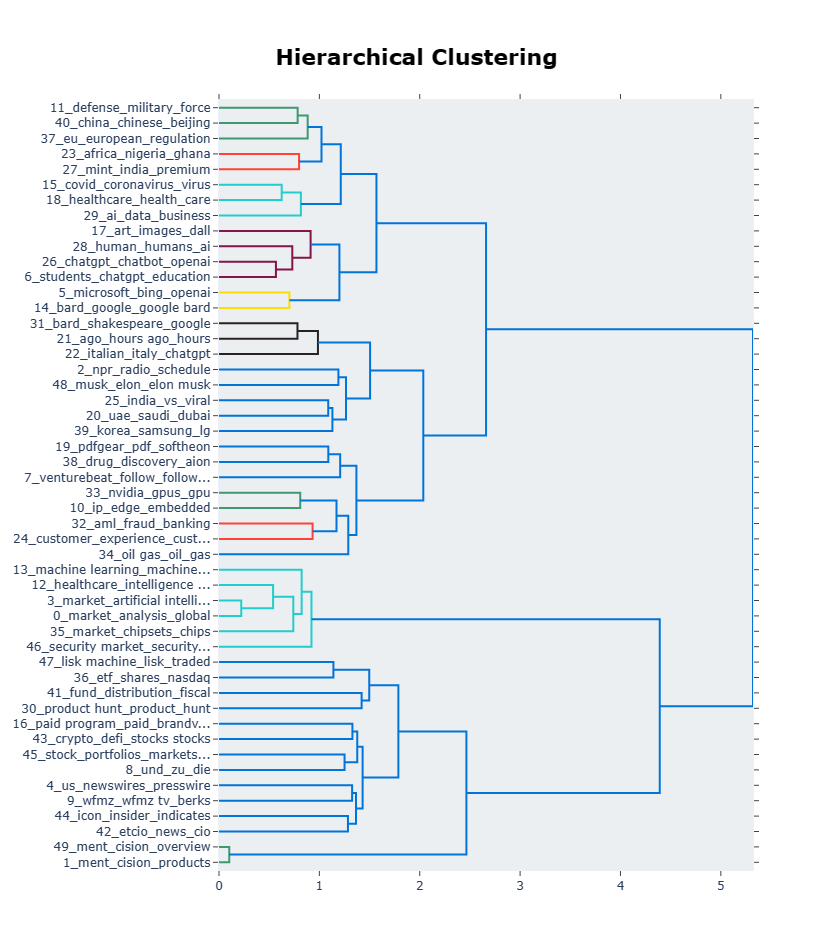

In [11]:
topic_model.visualize_hierarchy(top_n_topics=50)